## Projeto Matplotlib - Categorização salarial dos campos da ciência de dados

    Salários de diferentes campos da ciência de dados no domínio da ciência de dados
    Dicionário de dados:

  - Ano de Trabalho: O ano em que o salário foi pago ( 2020, 2021, 2022)
  - Designação: O papel desempenhado durante o ano
  - Experiência: O nível de experiência no trabalho durante o ano. 
     
      [ PT - Nível de entrada / Júnior, MI - Nível médio /   Intermediário, SE - Nível sênior / Especialista, EX - Nível executivo / Diretor ]
      
  - Situação Laboral:	O tipo de emprego para a função.
     
      [ PT - Part time, FT - Full time, CT - Contract, FL - Freelance ]
      
  - Salário em rúpias: O valor total do salário bruto pago.
  - Localização do funcionário: O principal país de residência do empregado durante o ano de trabalho como um código de país ISO 3166. ( PFB Link para o código de país ISO 3166 )
  - Localização da empresa: O país da sede ou sucursal contratante do empregador.
  - Tamanho da empresa: O número médio de pessoas que trabalharam para a empresa durante o ano. 
      
      [ S(pequeno) - Menos de 50 trabalhadores, M (médio) - 50 a 250 trabalhadores, L (grande) - Mais de 250 trabalhadores ]
      
  - Relação de trabalho remoto: A quantidade total de trabalho feito remotamente. 
      
      [ 0 - Sem trabalho remoto (menos de 20%), 50 - Parcialmente remoto, 100 - totalmente remoto (mais de 80%) ]
        
        
- https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py

## Importar as bibliotecas necesssárias

In [2]:
#!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt

 ## Importar a base de dados e visualizar as 10 primeiras linhas

In [3]:
df = pd.read_csv("./Data_Science_Fields_Salary_Categorization.csv")

df.head(10)

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50
5,6,2020,Data Analyst,EN,FT,"5,729,004.00",US,US,L,100
6,7,2020,Lead Data Scientist,SE,FT,"15,118,205.00",US,US,S,100
7,8,2020,Data Scientist,MI,FT,"2,843,416.00",HU,HU,L,50
8,9,2020,Business Data Analyst,MI,FT,"10,741,883.00",US,US,L,100
9,10,2020,Lead Data Engineer,SE,FT,"9,946,188.00",NZ,NZ,S,50


## Verificar os domínios dos dados e se há valores nulos

In [4]:
print(df.isna().count())
print('--------------------------------')
print(df.dtypes)

Unnamed: 0              607
Working_Year            607
Designation             607
Experience              607
Employment_Status       607
Salary_In_Rupees        607
Employee_Location       607
Company_Location        607
Company_Size            607
Remote_Working_Ratio    607
dtype: int64
--------------------------------
Unnamed: 0               int64
Working_Year             int64
Designation             object
Experience              object
Employment_Status       object
Salary_In_Rupees        object
Employee_Location       object
Company_Location        object
Company_Size            object
Remote_Working_Ratio     int64
dtype: object


## Corrigir os domínios dos dados

In [5]:
df['Salary_In_Rupees'] = df['Salary_In_Rupees'].str.replace(',', '')
df['Salary_In_Rupees'] = df['Salary_In_Rupees'].astype("float")
df['Working_Year'] = df['Working_Year'].astype('int')
df['Designation'] = df['Designation'].astype('str')
df.dtypes



Unnamed: 0                int64
Working_Year              int64
Designation              object
Experience               object
Employment_Status        object
Salary_In_Rupees        float64
Employee_Location        object
Company_Location         object
Company_Size             object
Remote_Working_Ratio      int64
dtype: object

## Excluir colunas desnecessárias

In [6]:
#Média salarial + experiência + data + designação 
df_test = df.loc[:, ['Salary_In_Rupees', 'Experience', 'Working_Year', 'Designation']]

#df_test.dtypes
display(df_test)

,Salary_In_Rupees,Experience,Working_Year,Designation
0,6352272.0,MI,2020,Data Scientist
1,20688070.0,SE,2020,Machine Learning Scientist
2,8674985.0,SE,2020,Big Data Engineer
3,1591390.0,MI,2020,Product Data Analyst
4,11935425.0,SE,2020,Machine Learning Engineer
...,...,...,...,...
602,12253703.0,SE,2022,Data Engineer
603,10025757.0,SE,2022,Data Engineer
604,10264466.0,SE,2022,Data Analyst
605,11935425.0,SE,2022,Data Analyst


## Verificar os dados estatísticos da base

In [7]:
df_test.describe()

,Salary_In_Rupees,Working_Year
count,6.070000e+02,607.000000
mean,8.935485e+06,2021.405272
std,5.646034e+06,0.692133
min,2.274890e+05,2020.000000
25%,4.991076e+06,2021.000000
50%,8.081874e+06,2022.000000
75%,1.193542e+07,2022.000000
max,4.774170e+07,2022.000000


## Plotar a média salarial em um gráfico separando em dois subplots com 1 linha 2 colunas:
-  No primeiro apresentar a média salarial por tipo de experiência para o ano de 2020
-  No segundo apresentar a média salarial por tipo de experiência para o ano de 2022

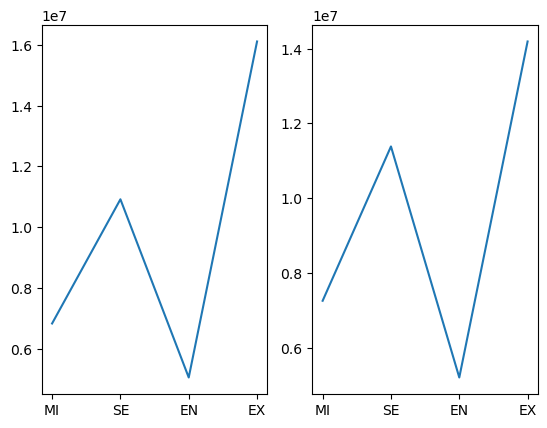

In [70]:
def calcular_media(data, tipo_experiencia):
    return [data[data['Experience']==experiencia]['Salary_In_Rupees'].mean() for experiencia in tipo_experiencia]

tipo_experiencia = df_test['Experience'].unique()

data_2020 = df_test[df_test['Working_Year']==2020]
data_2022 = df_test[df_test['Working_Year']==2022]

media_2020=calcular_media(data_2020, tipo_experiencia)
media_2022=calcular_media(data_2022, tipo_experiencia)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(tipo_experiencia, media_2020)
ax[1].plot(tipo_experiencia, media_2022)
plt.show()

## Melhorando a visualização
- Para aumentar o tamanho do gráfico podemos usar o `figsize=(x,y)`
- Se quisermos mudar a proporção dos gráficos, podemos usar o `gridspec_kw={'height_ratios': []}`

## Plotar a média salarial em um gráfico de barras separando em dois subplots com 2 linhas 1 coluna:
- No primeiro apresentar a média salarial pela Designação para o ano de 2022 para os top 5
- No segundo apresentar a média salarial pela Designação para o ano de 2022 para as 5 menores médias

## Colocando rótulo nos dados
- Para isso, vamos usar o `annotate`
    - https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.annotate.html
    - Para usar o annotate, vamos passar `.annotate("<Texto>",<posicao(x,y)>)`
- Podemos posicionar o annotate exatamente em cima da barra usando a posição y
- Usando o `for`, é possível aplicar o annotate para todas as barras
- Por fim, vamos usar os parâmetros do annotate para melhorar a visualização
    - ha         -> alinhamento horizontal
    - xytext     -> deslocamento x,y do texto em relação a um referencial
    - textcoords -> referencial que vamos fazer o deslocamento acima
    - fontsize   -> tamanho da fonte
    - fontweight -> colocando em negrito

## Ajustando o eixo y para melhorar a visualização dos rótulos
- O `.set_yticks` vai permitir que alterar o intervalo do eixo y
- O `.yaxis.set_visible` permite que os valores do eixo y não fiquem visíveis

## Retirando bordas do gráfico
- Usando o `.spines[].set_visible(False)` é possível retirar as bordas de um gráfico

## Conclusão
Com base nos gráficos apresentados, qual a conclusão que se pode chegar?